In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [112]:
#sales data
active_sales = pd.read_csv('./cleaned_csv_3_1', index_col=0)
completed_sales = pd.read_csv('./cleaned_completed_3_4', index_col=0)
df = pd.concat([active_sales, completed_sales], axis=0)

In [113]:
zipcodes = pd.read_csv('./zips.csv', dtype='object')
geographic = df[['postalCode']]
zips = pd.merge(zipcodes, geographic, right_on='postalCode', left_on='ZIP', how='right')
zips = zips.dropna()

zips['LAT'] = zips['LAT'].astype(float)
zips['LNG'] = zips['LNG'].astype(float)

In [114]:
grouped = zips.groupby(['postalCode', 'LAT', 'LNG'], as_index=False)['ZIP'].count()

In [98]:
grouped['ZIP'] = grouped['ZIP'].apply(lambda x: 100 if x > 100 else x) 

In [115]:
import numpy as np
lat = grouped['LAT'].values
lon = grouped['LNG'].values
size = grouped['ZIP'].values 
np.max(size)

5881

/Users/slevin886/anaconda2/envs/tensorflow/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/slevin886/anaconda2/envs/tensorflow/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/slevin886/anaconda2/envs/tensorflow/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/slevin886/anaconda2/envs/tensorflow/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


Text(0.5,1,'Sellers by ZIP Code')

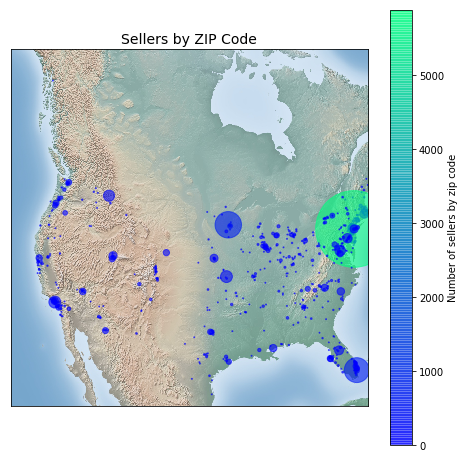

In [119]:
#width=8E6, height=8E6, lat_0=45, lon_0=-100,)
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, 
            lat_0=45, lat_1=65, lon_0=-100,
            width=5E6, height=5E6)
m.shadedrelief()

m.scatter(lon, lat, latlon=True,
          c=size, s=size,
          cmap='winter', alpha=0.6)
plt.colorbar(label='Number of sellers by zip code')
plt.clim(0, 5881)
plt.title('Sellers by ZIP Code', size=14)